<a href="https://colab.research.google.com/github/ahmadcah/Hukumpedia/blob/master/Google_Colab/Prototype_Capstone_Project_Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np 
import string

In [ ]:
realCorpus = []
with open('/content/drive/MyDrive/MergedData.txt', 'rb') as f:
  data = ' '.join([x.decode('utf-8') for x in f.readlines()])
  data = data.replace('“”', '')
  data = ' '.join(i for i in data.split())
data[:400]

'DEKLARASI UNIVERSAL HAK-HAK ASASI MANUSIA Diterima dan diumumkan oleh Majelis Umum PBB pada tanggal 10 Desember 1948 melalui resolusi 217 A (III) Mukadimah Menimbang, bahwa pengakuan atas martabat alamiah dan hak-hak yang sama dan tidak dapat dicabut dari semua anggota keluarga manusia adalah dasar kemerdekaan, keadilan dan perdamaian di dunia, Menimbang, bahwa mengabaikan dan memandang rendah hak'

In [ ]:
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
data = data.translate(translator)

In [ ]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

'DEKLARASI UNIVERSAL HAK ASASI MANUSIA Diterima dan diumumkan oleh Majelis Umum PBB pada tanggal 10 Desember 1948 melalui resolusi 217 A III Mukadimah Menimbang bahwa pengakuan atas martabat alamiah hak yang sama tidak dapat dicabut dari semua anggota keluarga manusia adalah dasar kemerdekaan keadilan perdamaian di dunia mengabaikan memandang rendah telah mengakibatkan perbuatan bengis menimbulkan rasa kemarahan hati nurani umat terbentuknya suatu tempat akan mengecap nikmat kebebasan berbicara b'

In [ ]:
tokenizer = Tokenizer(oov_token='oov')
tokenizer.fit_on_texts([data])

In [ ]:
total_words = len(tokenizer.word_index) + 1
print(total_words)

17581


In [ ]:
import pickle

with open('/content/drive/MyDrive/Bangkit Capstone/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import io,json

tokenizer_json = tokenizer.to_json()
with io.open('/content/drive/MyDrive/Bangkit Capstone/tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [ ]:
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[4, 5, 6, 7, 8, 660, 9, 661, 662, 10]

In [ ]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  20880


array([[  4,   5],
       [  5,   6],
       [  6,   7],
       [  7,   8],
       [  8, 660],
       [660,   9],
       [  9, 661],
       [661, 662],
       [662,  10],
       [ 10,  11]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
predictors = np.array(X)
label = np.array(y)

In [ ]:
label = tf.keras.utils.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 250, input_length=1))
model.add(Bidirectional(LSTM(500, return_sequences=True)))
model.add(Bidirectional(LSTM(500)))
model.add(Dropout(0.2))
model.add(Dense(1000, activation="relu"))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 250)            4395250   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1, 1000)           3004000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 1000)              6004000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 17581)             17598581  
Total params: 32,002,831
Trainable params: 32,002,831
Non-trainable params: 0
__________________________________________

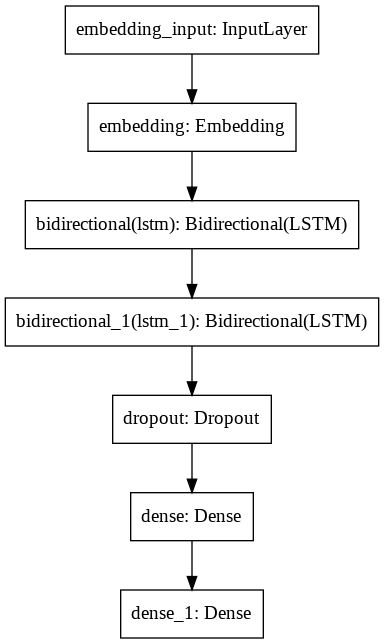

In [ ]:
tf.keras.utils.plot_model(model, to_file='/content/drive/MyDrive/Bangkit Capstone/model.png', show_layer_names=True)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      self.model.stop_training = True

#checkpoint = tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Bangkit Capstone/checkpoint/model", monitor='loss', verbose=1,save_best_only=True, mode='auto')

reduceLoss = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)
callbacksEarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
preventOverfit = myCallback()

In [ ]:
history = model.fit(predictors, label, epochs=500, verbose=1, callbacks=[preventOverfit,callbacksEarlyStopping,reduceLoss])

Epoch 1/500
653/653 [==============================] - 26s 33ms/step - loss: 9.8597 - accuracy: 0.0000e+00
Epoch 2/500
653/653 [==============================] - 21s 33ms/step - loss: 9.7085 - accuracy: 4.7893e-05
Epoch 3/500
653/653 [==============================] - 21s 33ms/step - loss: 9.5676 - accuracy: 4.3103e-04
Epoch 4/500
653/653 [==============================] - 21s 33ms/step - loss: 9.2418 - accuracy: 9.5785e-04
Epoch 5/500
653/653 [==============================] - 21s 33ms/step - loss: 8.8714 - accuracy: 0.0034
Epoch 6/500
653/653 [==============================] - 21s 33ms/step - loss: 8.5034 - accuracy: 0.0059
Epoch 7/500
653/653 [==============================] - 21s 33ms/step - loss: 8.1692 - accuracy: 0.0112
Epoch 8/500
653/653 [==============================] - 21s 33ms/step - loss: 7.8842 - accuracy: 0.0182
Epoch 9/500
653/653 [==============================] - 21s 33ms/step - loss: 7.6393 - accuracy: 0.0264
Epoch 10/500
653/653 [==============================] - 2

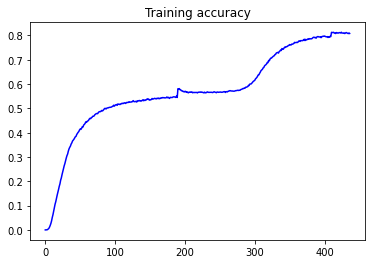

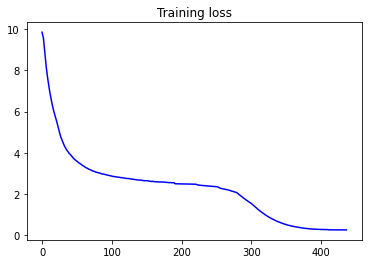

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b')
plt.title('Training loss')


plt.show()

In [ ]:
text = "hukum"
print('input: '+text)
print('nomor itu accuracy')

token_list = tokenizer.texts_to_sequences([text])[0]
token_list = pad_sequences([token_list], maxlen=1)

predictions = model.predict(token_list)

indices = np.argpartition(predictions, -10)[0][-10:]

results = {}
for index in indices:
  key = [k for (k, v) in tokenizer.word_index.items() if v == index]
  results.update({key[0]: predictions[0, index]})

  results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

print("{}".format(results))
for i in results:
  print(text+" "+i)

input: hukum
nomor itu accuracy
{'hamid': 0.33673173, 'supaya': 0.33176455, 'konvensi': 0.33046797, 'gugatannya': 0.00018817352, 'diberlakukannya': 0.00016991662, 'menghiraukan': 0.00016071345, 'para': 0.00015414269, 'tve': 7.9861165e-05, 'bacalah': 7.265037e-05, '761': 7.171022e-05}
hukum hamid
hukum supaya
hukum konvensi
hukum gugatannya
hukum diberlakukannya
hukum menghiraukan
hukum para
hukum tve
hukum bacalah
hukum 761


In [ ]:
model.save('/content/drive/MyDrive/Bangkit Capstone/checkpoint/model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bangkit Capstone/checkpoint/model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bangkit Capstone/checkpoint/model/assets


In [ ]:
model.save('/content/drive/MyDrive/Bangkit Capstone/checkpoint/model/saved_prototype_model_HDF5/my_model.h5')

In [ ]:
import pathlib

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/Bangkit Capstone/checkpoint/model')
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('/content/drive/MyDrive/Bangkit Capstone/modelSizeOptimize.tflite')
tflite_model_file.write_bytes(tflite_model)

32153616

In [ ]:
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]
tflite_model = converter.convert()
tflite_model_file = pathlib.Path('/content/drive/MyDrive/Bangkit Capstone/modelLatencyOptimize.tflite')
tflite_model_file.write_bytes(tflite_model)

32153616

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
tflite_model_file = pathlib.Path('/content/drive/MyDrive/Bangkit Capstone/modelDefaultOptimize.tflite')
tflite_model_file.write_bytes(tflite_model)

32153616

In [3]:
from google.colab import auth
auth.authenticate_user()
project_id = 'hukumpedia'
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
gs://hukumpedia.appspot.com/
gs://instrumenhukum/
gs://staging.hukumpedia.appspot.com/


In [5]:
!gsutil -m cp -r /content/drive/MyDrive/BangkitCapstone gs://instrumenhukum/

Copying file:///content/drive/MyDrive/BangkitCapstone/model.png [Content-Type=image/png]...
Copying file:///content/drive/MyDrive/BangkitCapstone/tokenizer.pickle [Content-Type=application/octet-stream]...
Copying file:///content/drive/MyDrive/BangkitCapstone/modelSizeOptimize.tflite [Content-Type=application/octet-stream]...
Copying file:///content/drive/MyDrive/BangkitCapstone/modelLatencyOptimize.tflite [Content-Type=application/octet-stream]...
Copying file:///content/drive/MyDrive/BangkitCapstone/tokenizer.json [Content-Type=application/json]...
Copying file:///content/drive/MyDrive/BangkitCapstone/modelDefaultOptimize.tflite [Content-Type=application/octet-stream]...
Copying file:///content/drive/MyDrive/BangkitCapstone/checkpoint/model/keras_metadata.pb [Content-Type=application/octet-stream]...
Copying file:///content/drive/MyDrive/BangkitCapstone/checkpoint/model/saved_model.pb [Content-Type=application/octet-stream]...
Copying file:///content/drive/MyDrive/BangkitCapstone/che